In [1]:
#Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

In [2]:
#Load the data from the given url
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


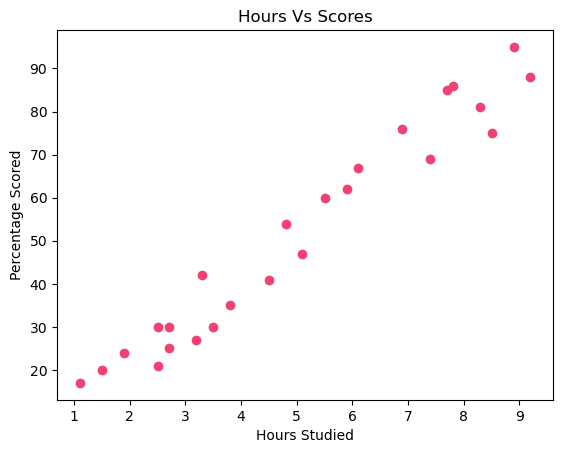

In [3]:
# Check for the relationship between the two variables
plt.scatter(data['Hours'],data['Scores'],color = '#F44174')
plt.title("Hours Vs Scores")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scored")
plt.show()

#This shows that there is a clear positive relationship between the number of hours studied and the percentage scored.

# Divide the data into input and output

In [4]:
x = data.iloc[:,:1].values
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [5]:
y = data.iloc[:,1].values
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

#Split the data to training and testing data

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2)


In [7]:
x_train.shape

(20, 1)

In [8]:
x_test.shape

(5, 1)

In [9]:
y_train.shape

(20,)

In [10]:
y_test.shape

(5,)

#Train the algorithm

In [11]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

#Plot the regression line

In [12]:
line = lr.coef_*x+lr.intercept_
line

array([[25.75423626],
       [51.1295785 ],
       [32.58605917],
       [84.31271834],
       [35.51398328],
       [15.99448925],
       [91.14454124],
       [55.0334773 ],
       [82.36076893],
       [27.70618567],
       [76.50492073],
       [58.93737611],
       [45.27373029],
       [33.56203387],
       [12.09059045],
       [88.21661714],
       [25.75423626],
       [19.89838806],
       [60.88932551],
       [73.57699662],
       [27.70618567],
       [48.20165439],
       [38.44190738],
       [68.69712312],
       [77.48089543]])

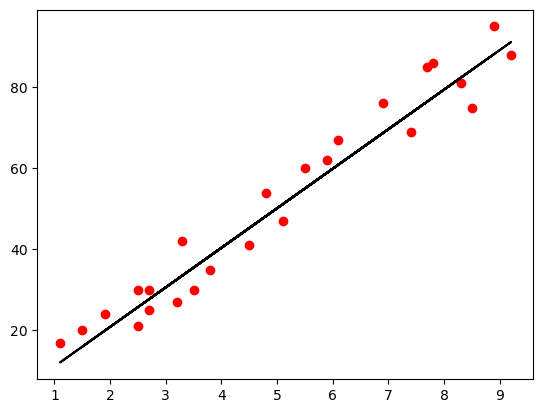

In [13]:
#plotting with regression line
plt.scatter(x,y,color = 'red')
plt.plot(x,line,color = 'black');
plt.show()

In [14]:
#Predictions
y_pred = lr.predict(x_test)
y_pred

array([25.75423626, 88.21661714, 55.0334773 , 48.20165439, 33.56203387])

In [15]:
#compare the actual data with predictions
df = pd.DataFrame({"Actual": y_test,"Predictions":y_pred})
df

,Actual,Predictions
0,30,25.754236
1,95,88.216617
2,60,55.033477
3,54,48.201654
4,42,33.562034


In [16]:
#Check for accuracy
r2_score(y_test,y_pred)

0.9197914354519572

#We got 94% accuracy

In [17]:
mean_absolute_error(y_test,y_pred)

6.046396205178935

In [18]:
#Test the prediction for 9.25hrs/day of study time
new_hours = np.array([[9.25]])
new_pred = lr.predict(new_hours)
new_pred

array([91.6325286])

In [19]:
predicted_percentage = new_pred[0]
print(f"For {new_hours[0][0]} hours of study time, the predicted percentage is: {predicted_percentage:.2f}")

For 9.25 hours of study time, the predicted percentage is: 91.63
